In [106]:
from importlib import reload
# from imp import reload
import matplotlib.pyplot as plt
import numpy as np

from ipcv import cvlib, scanner

reload(cvlib)
reload(scanner)

<module 'ipcv.scanner' from '/Users/everhett/Projects/python-ws/qr-scanner/ipcv/scanner.py'>

In [107]:
# A function to display side-by-side visuals for comparisons.
def display(source_img, processed_img, cropped_img, ):
    # Display the previous and current side-by-side for visual comparison.
    plt.figure(figsize=(14, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(source_img, cmap='gray')
    plt.title('Source Image')

    plt.subplot(1, 3, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')

    if cropped_img is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(cropped_img, cmap='gray')
        plt.title('Cropped Image')

Info                : size=1,724,100, RxC=[1,050x1,642], box-ratio-on: False, attempt-limit: 12
----------> [BEGIN, attempt=1]
[1] --Binarize      : at min-thresh=80, [black=87.76%, white=12.24%]
[1] --Ratio-check   : [black=87.76%, white=12.24%] within 97% limit.
[1] --Morphing      : at iteration-rate=0.5 for interation(s)=2, dilate=2, erode=1
[1] --Contour       : found=293; min-req-area=86,205.00 (0.05 at rate); area should be > 5.00%
----------> [BEGIN, attempt=2]
[2] --Binarize      : at min-thresh=96, [black=87.23%, white=12.77%]
[2] --Ratio-check   : [black=87.23%, white=12.77%] within 97% limit.
[2] --Morphing      : at iteration-rate=0.5 for interation(s)=2, dilate=2, erode=1
[2] --Contour       : found=482; min-req-area=86,205.00 (0.05 at rate); area should be > 5.00%
----------> [BEGIN, attempt=3]
[3] --Binarize      : at min-thresh=112, [black=86.60%, white=13.40%]
[3] --Ratio-check   : [black=86.60%, white=13.40%] within 97% limit.
[3] --Morphing      : at iteration-rate=

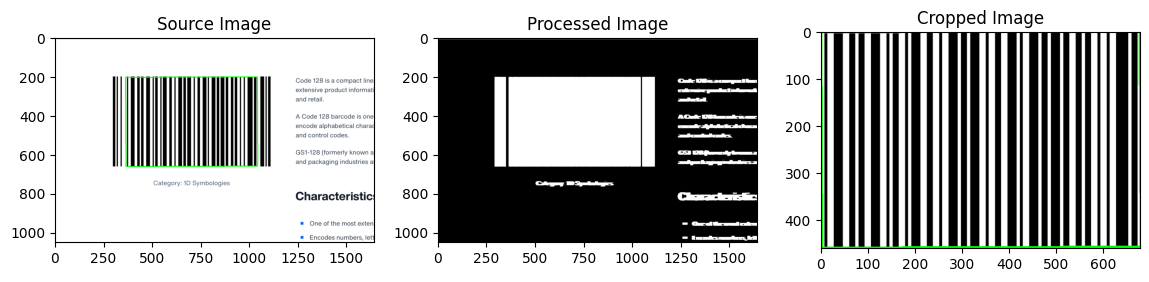

In [119]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode101.png')
cropped, processed = scanner.detect_barcode_v2(image=image,
                                               gamma=1,
                                               gaussian_ksize=(3, 3),
                                               gaussian_sigma=1,
                                               min_threshold=80,
                                               threshold_rate=0.2,
                                               max_pixel_limit=97,
                                               attempt_limit=12,
                                               iteration=2,
                                               iteration_rate=0.5,
                                               min_area_factor=0.05,
                                               box=False)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [109]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode102.png')
cropped, processed = scanner.detect_barcode_v2(image=image,
                                               gamma=1,
                                               gaussian_ksize=(3, 3),
                                               gaussian_sigma=1,
                                               thresh_min=80,
                                               attempt_limit=10,
                                               iteration=20,
                                               iteration_rate=0.5,
                                               min_area_factor=0.05,
                                               box=False)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

KeyError: 'max_pixel_limit'

In [ ]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode111.png')
cropped, processed = scanner.detect_barcode_v2(image=image,
                                               gamma=1,
                                               gaussian_ksize=(3, 3),
                                               gaussian_sigma=1,
                                               thresh_min=55,
                                               attempt_limit=10,
                                               iteration=40,
                                               iteration_rate=0.1,
                                               min_area_factor=0.05,
                                               box=False)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode112.png')
cropped, processed = scanner.detect_barcode_v2(image=image,
                                               gamma=1,
                                               gaussian_ksize=(3, 3),
                                               gaussian_sigma=1,
                                               thresh_min=80,
                                               attempt_limit=10,
                                               iteration=35,
                                               iteration_rate=0.5,
                                               min_area_factor=0.05,
                                               box=False)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode113.png')
cropped, processed = scanner.detect_barcode_v2(image=image,
                                               gamma=1,
                                               gaussian_ksize=(3, 3),
                                               gaussian_sigma=1,
                                               thresh_min=80,
                                               attempt_limit=15,
                                               iteration=35,
                                               iteration_rate=0.5,
                                               min_area_factor=0.05,
                                               box=False)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
image = cvlib.load_image('resources/barcode/barcode114.png')
cropped, processed = scanner.detect_barcode_v2(image=image,
                                               gamma=1,
                                               gaussian_ksize=(3, 3),
                                               gaussian_sigma=1,
                                               thresh_min=80,
                                               attempt_limit=10,
                                               iteration=10,
                                               iteration_rate=0.7,
                                               min_area_factor=0.05,
                                               box=False)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')